**CLUSTERING**

Given a dataset containing financial information for various stocks, the objective is to explore and identify inherent patterns or groupings among the stocks using unsupervised clustering techniques. The dataset includes information such as stock prices, financial ratios, and performance metrics. The goal is to apply clustering algorithms to segment stocks based on their financial characteristics, providing insights into potential similarities or differences among companies within the dataset.

 Here's a brief description of the columns:</br>
</br>

Ticker Symbol: Unique symbols representing individual stocks.</br>
Security: Name of the security or company.</br>
GICS Sector: Global Industry Classification Standard sector.</br>
GICS Sub Industry: Global Industry Classification Standard sub-industry.</br>
Current Price: Current stock price.</br>
Price Change: Change in stock price.</br>
Volatility: Measure of the stock's price volatility.</br>
ROE (Return on Equity): Financial performance indicator, calculated as net income divided by shareholders' equity.</br>
Cash Ratio: Ratio of a company's cash and cash equivalents to its current liabilities.</br>
Net Cash Flow: Net amount of cash being transferred into or out of a business.</br>
Net Income: Total profit after deducting all expenses.</br>
Earnings Per Share (EPS): Profit attributable to each outstanding share of common stock.</br>
Estimated Shares Outstanding: The approximate number of shares currently held by investors.</br>
P/E Ratio (Price-to-Earnings Ratio): Ratio of the market value per share to the earnings per share.</br>
P/B Ratio (Price-to-Book Ratio): Ratio of market value per share to book value per share.</br>

In [ ]:
# Get access of your google drive
from google.colab import drive
drive.mount('./gdrive')

Mounted at ./gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Imarticus_Stats

/content/gdrive/MyDrive/Imarticus_Stats


In [ ]:
# Importing necessary libraries for data analysis and visualization
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# Reading an Excel file

data=pd.read_csv('stock_data.csv')

In [ ]:
# let us make another copy of data
df = data.copy()

In [ ]:
# Displaying the first few rows of the Data
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


Lets have a look at column names

In [ ]:
# Retrieving the column names of the Data
df.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

Checking the numbers of rows and columns



In [ ]:
# Retrieving the dimensions (number of rows and columns) of the Data
df.shape

(340, 15)

Checking column type and missing values

In [ ]:
# Displaying concise information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [ ]:
# Check the unique values in each column of the dataframe.
df.nunique()

Ticker Symbol                   340
Security                        340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64

Statistical Summary

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.000,80.862,98.055,4.500,38.555,59.705,92.880,1274.950
Price Change,340.000,4.078,12.006,-47.130,-0.939,4.820,10.695,55.052
Volatility,340.000,1.526,0.592,0.733,1.135,1.386,1.696,4.580
ROE,340.000,39.597,96.548,1.000,9.750,15.000,27.000,917.000
Cash Ratio,340.000,70.024,90.421,0.000,18.000,47.000,99.000,958.000
Net Cash Flow,340.000,55537620.588,1946365312.176,-11208000000.000,-193906500.000,2098000.000,169810750.000,20764000000.000
Net Income,340.000,1494384602.941,3940150279.328,-23528000000.000,352301250.000,707336000.000,1899000000.000,24442000000.000
Earnings Per Share,340.000,2.777,6.588,-61.200,1.558,2.895,4.620,50.090
Estimated Shares Outstanding,340.000,577028337.754,845849595.418,27672156.860,158848216.100,309675137.800,573117457.325,6159292035.000
P/E Ratio,340.000,32.613,44.349,2.935,15.045,20.820,31.765,528.039


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Ticker Symbol,340,340,AAL,1
Security,340,340,American Airlines Group,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


In [ ]:
# Select only object columns
object_columns = df.select_dtypes(include='object').columns

# Display unique values for each object column
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")
    print()

Unique values for Ticker Symbol: ['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV'
 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APH' 'ARNC'
 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAC' 'BAX' 'BBT' 'BCR' 'BHI' 'BIIB'
 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG' 'CCI' 'CCL'
 'CELG' 'CF' 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME'
 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS'
 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA'
 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'DVN' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EMN' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES' 'ESS' 'ETFC' 'ETN'
 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'F' 'FAST' 'FB' 'FBHS' 'FCX' 'FE'
 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'FTR' 'GD' 'GGP'
 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN'
 'HCP' 'HES' 'HIG' 'HOG' 'HO

Text(0, 0.5, 'Values')

<Figure size 800x600 with 0 Axes>

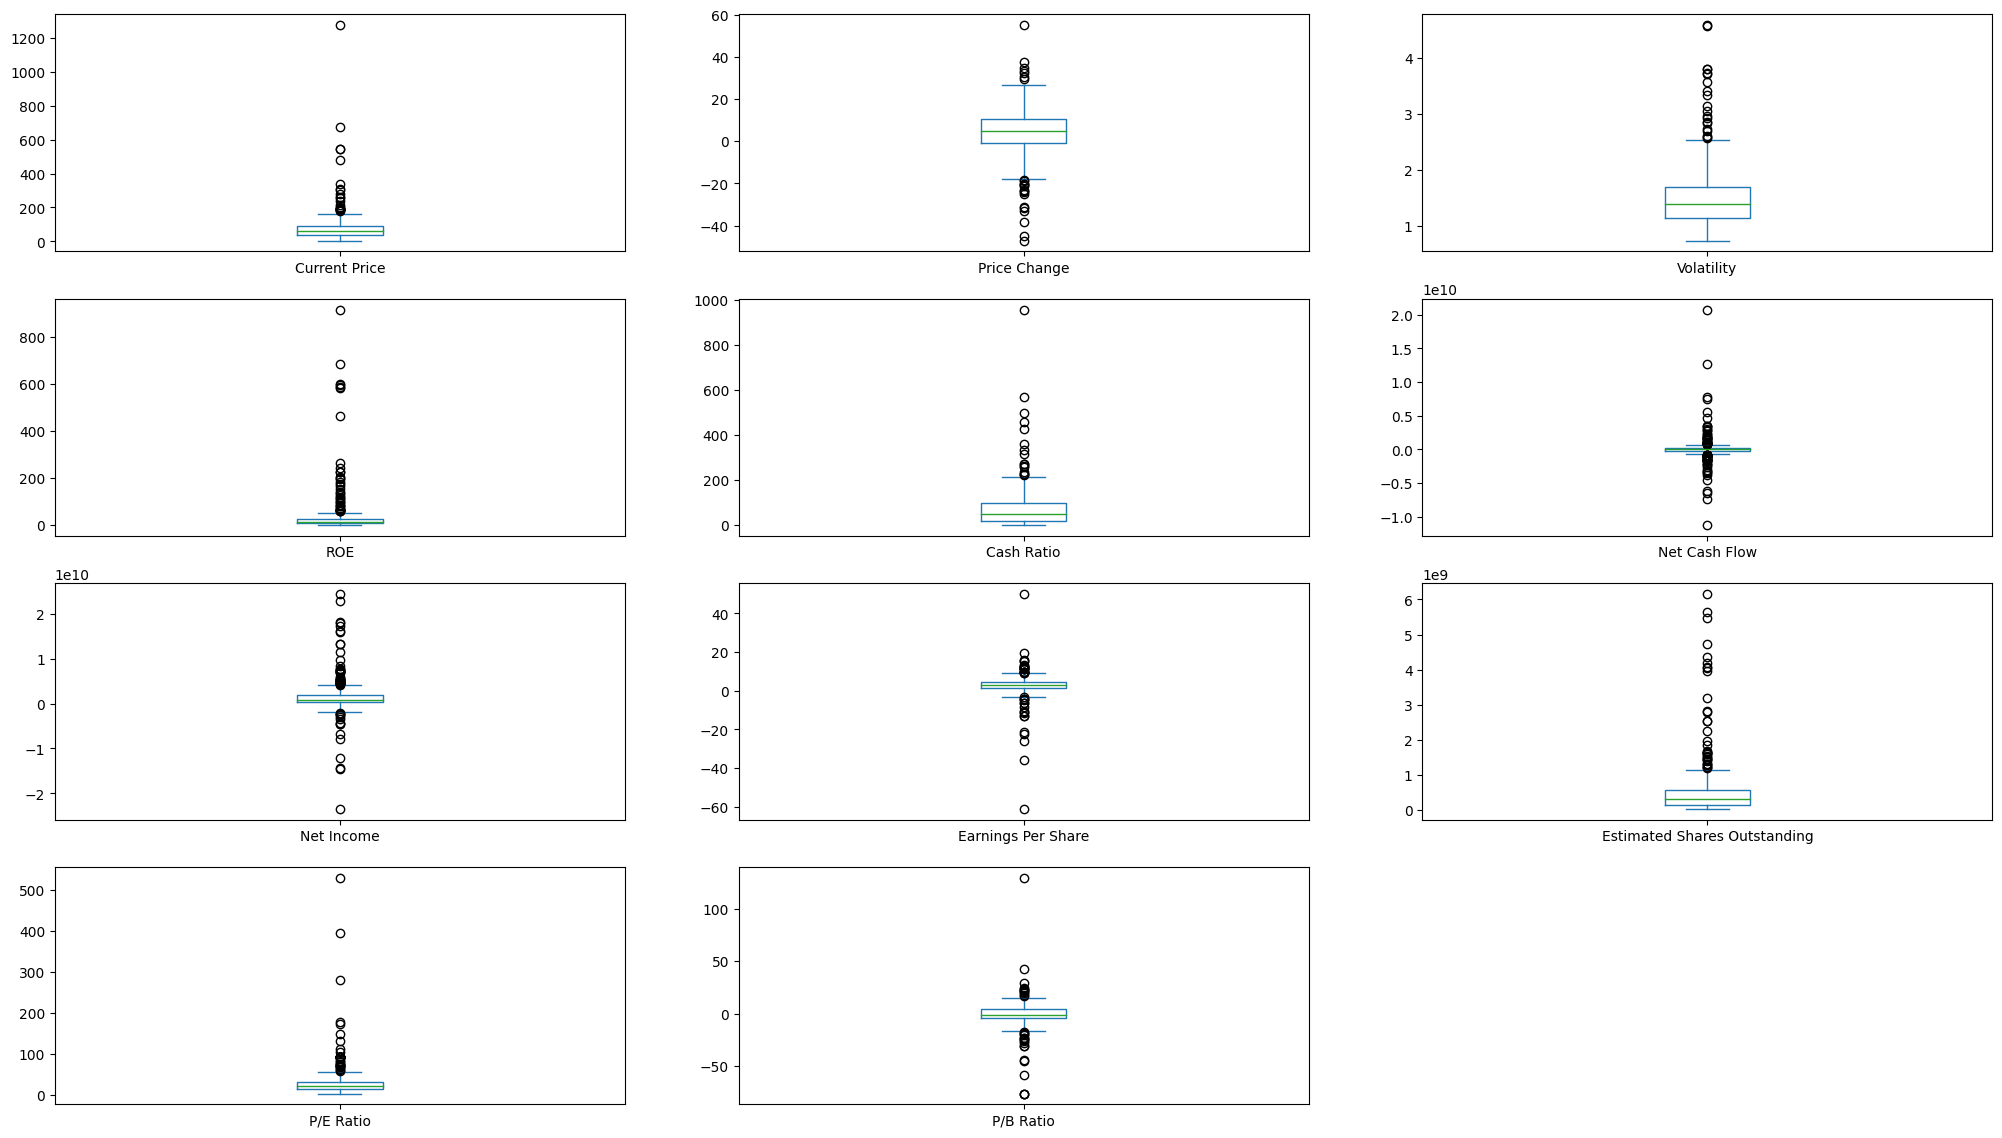

In [ ]:
# Melt the DataFrame to create boxplots for each column
melted_df = df.melt()

# Create multiple boxplots using Seaborn
plt.figure(figsize=(8, 6))
# Using Pandas to create multiple boxplots
boxplot = df.plot(kind='box',subplots=True, layout=(11,3), sharex=False, sharey=False, figsize=(25,40))
plt.xlabel('Columns')
plt.ylabel('Values')

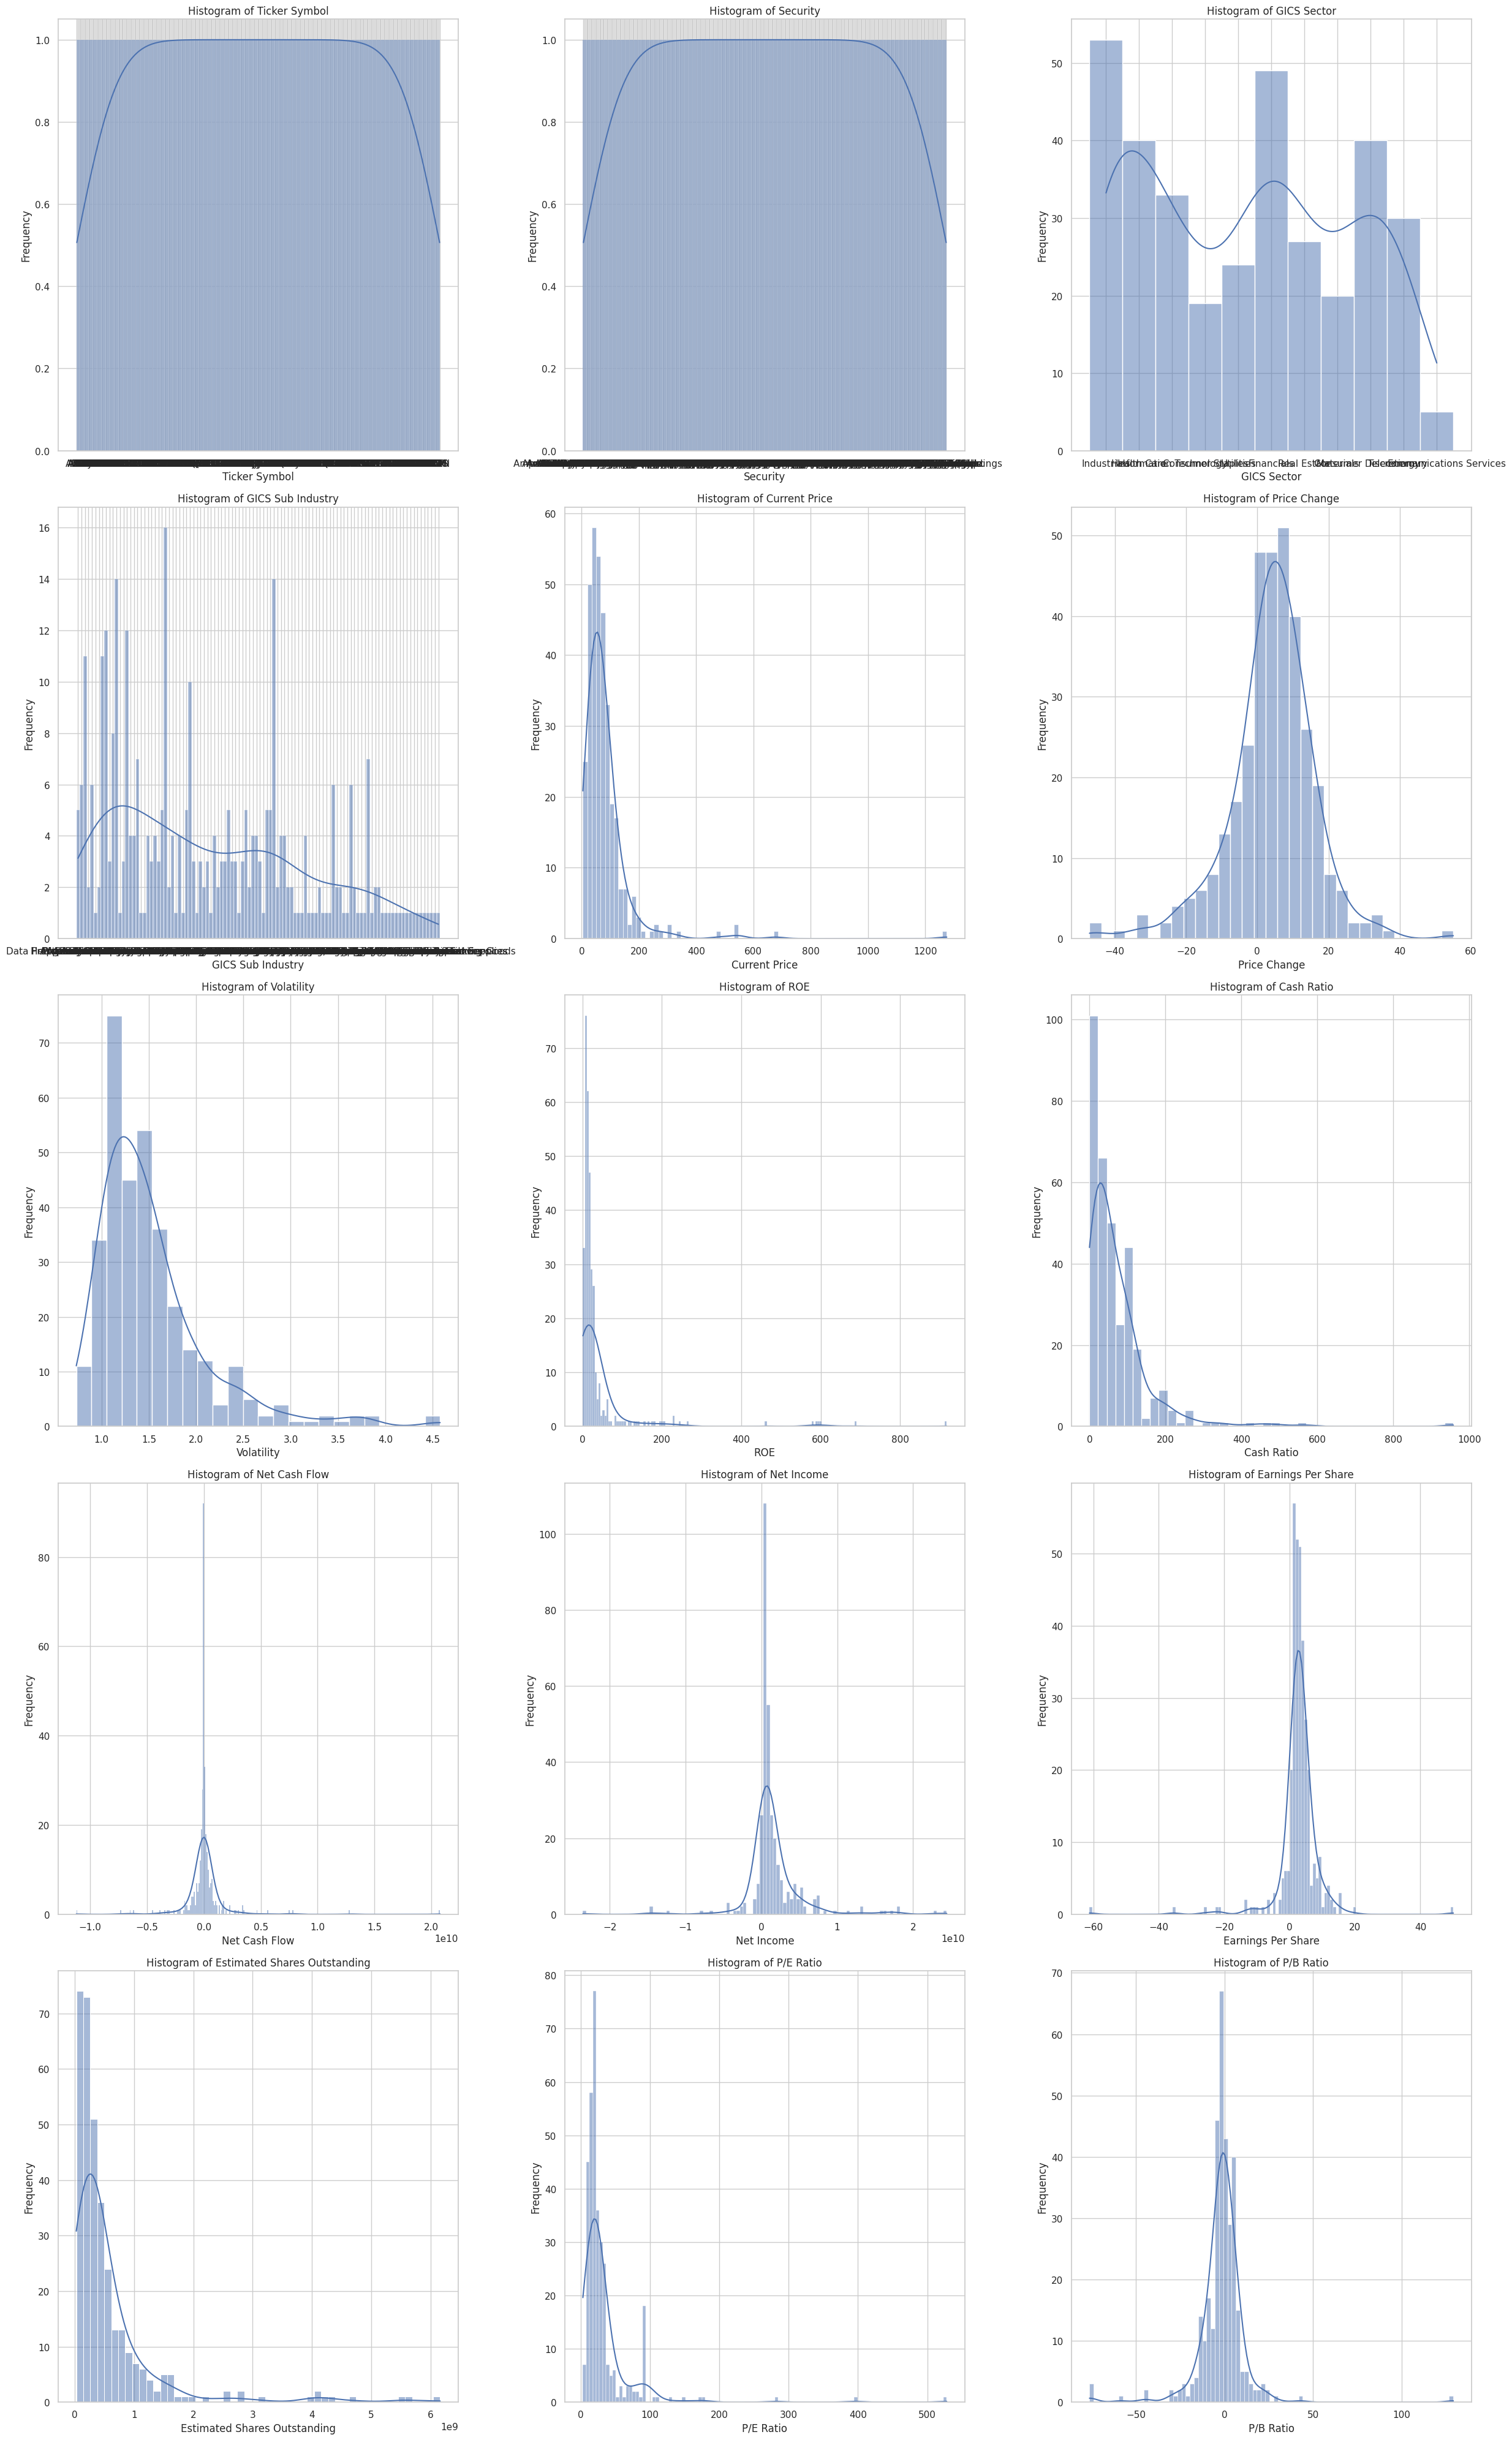

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df'
# If you haven't imported seaborn and matplotlib.pyplot, you can do so with:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(df.columns)//3, ncols=3, sharex=False, sharey=False, figsize=(25, 40))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot histograms for all columns
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


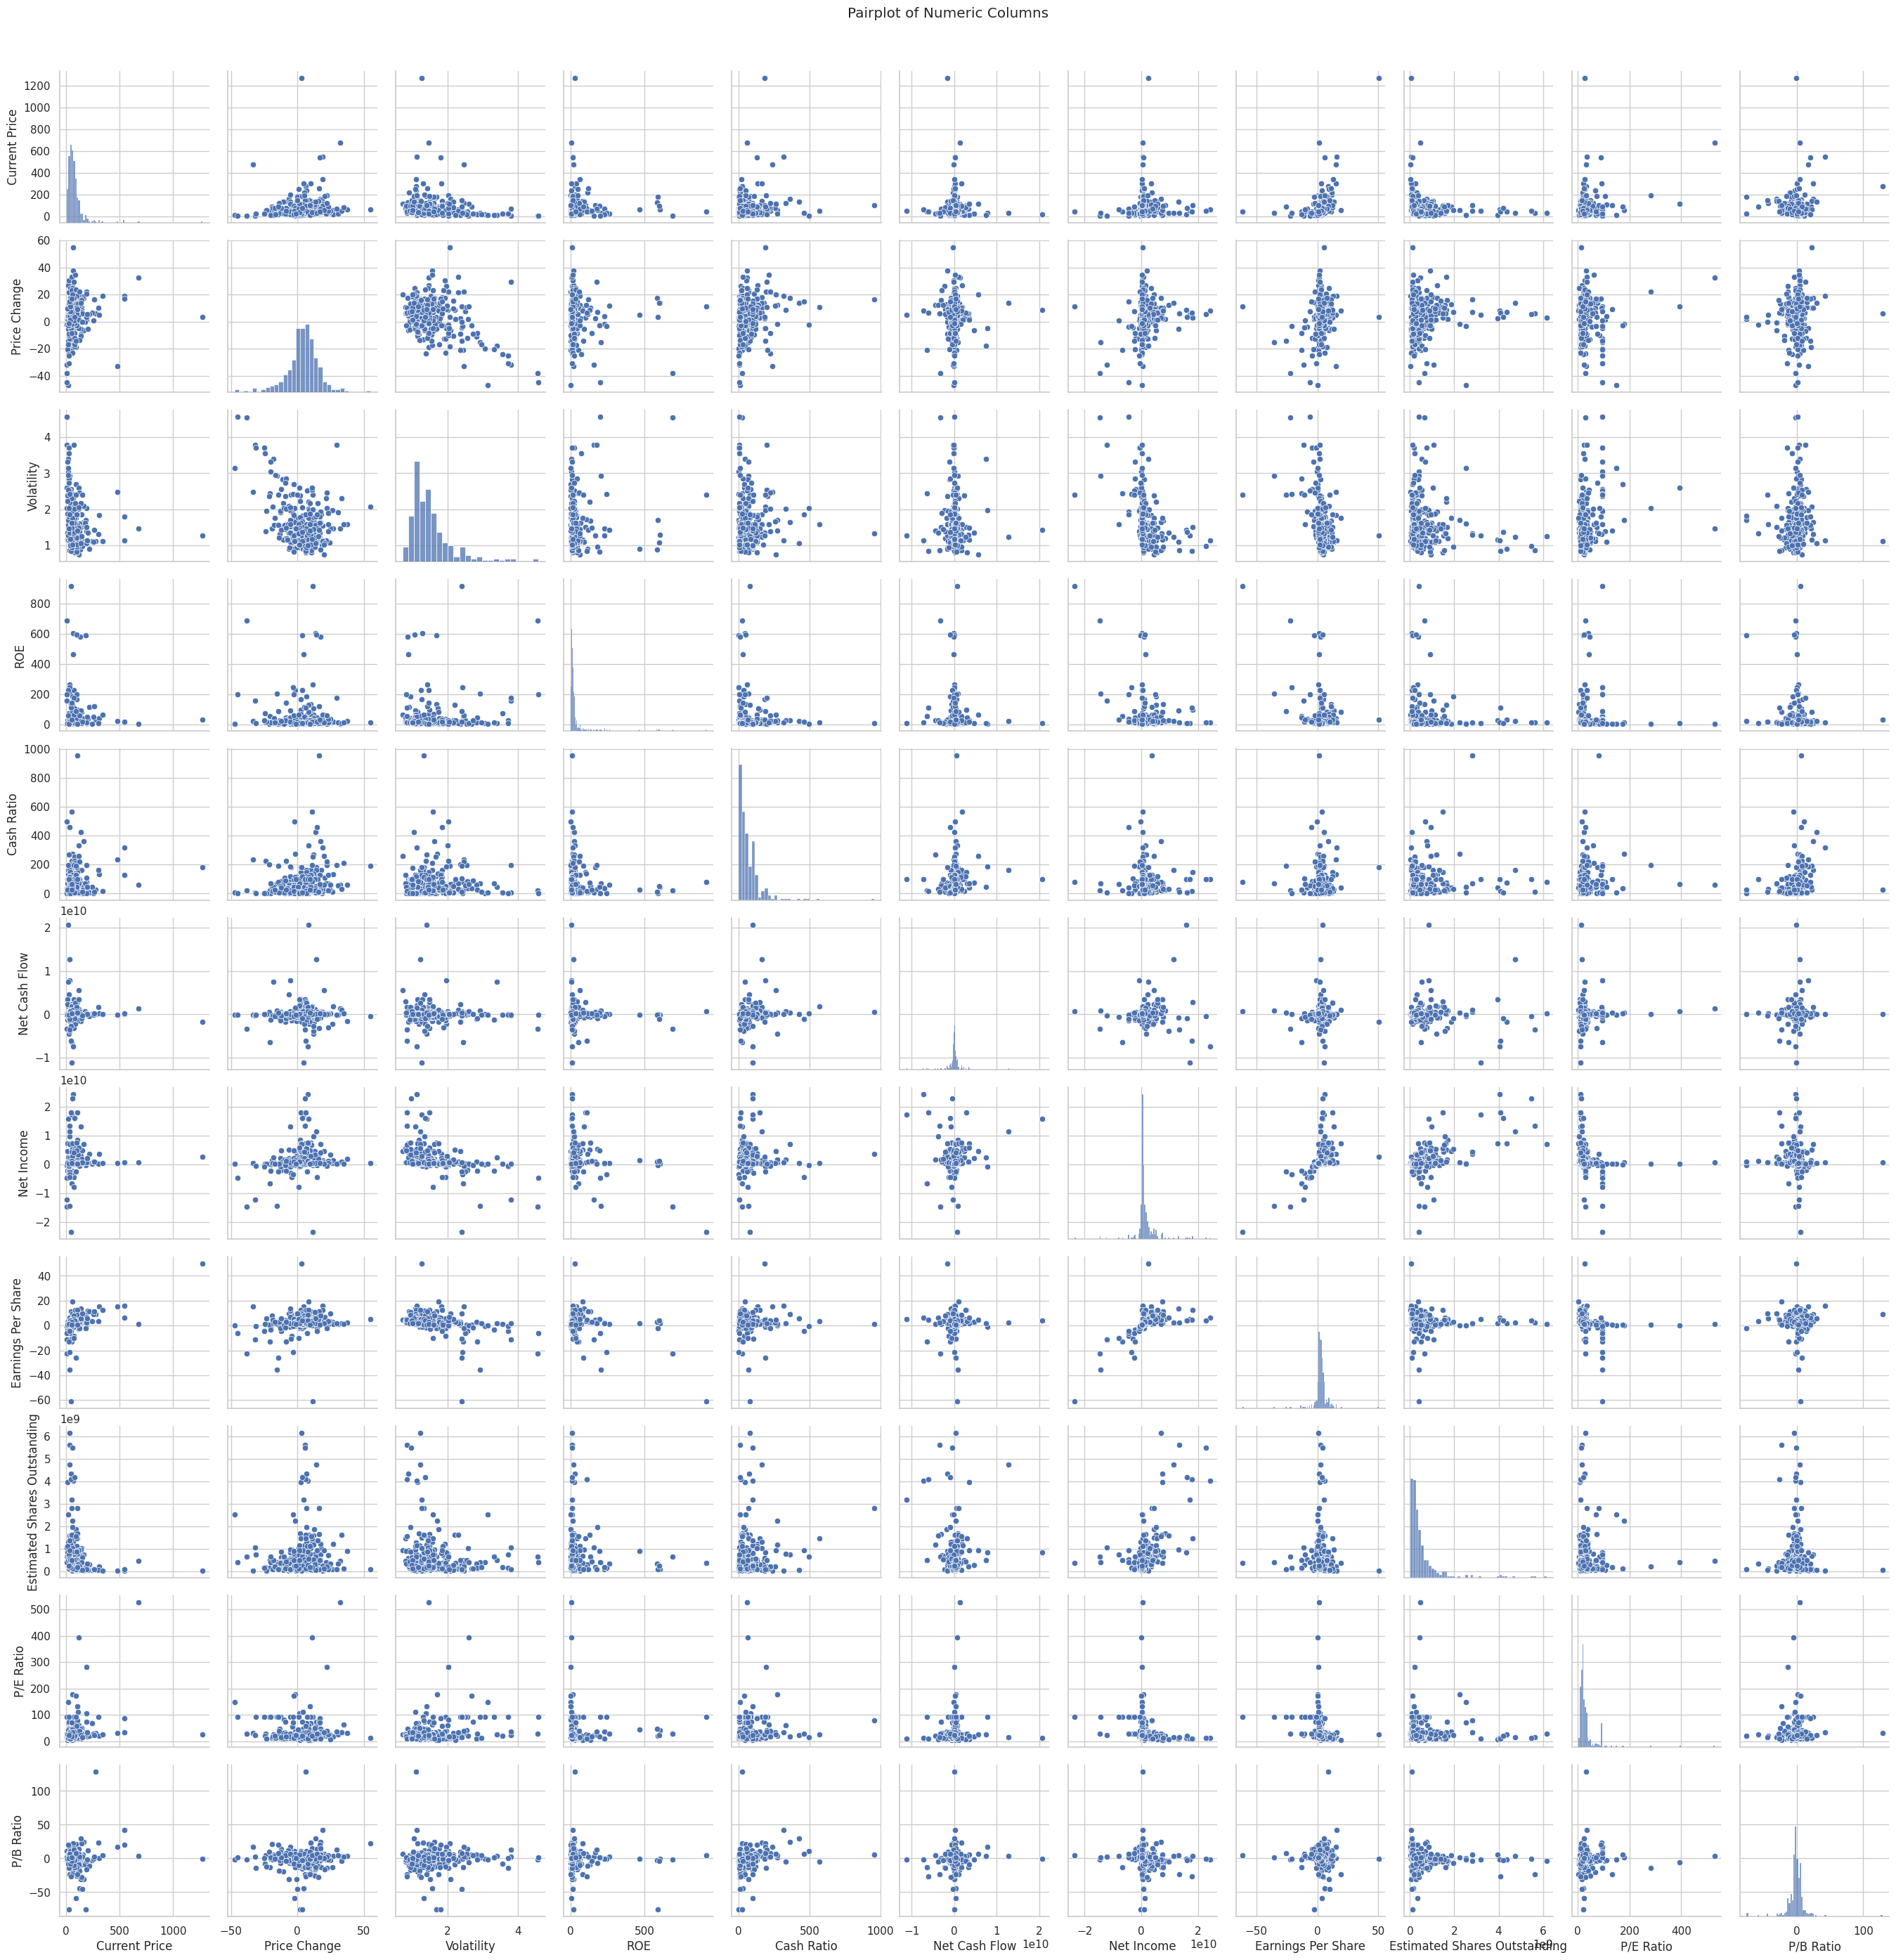

In [ ]:
# Pairplot for numeric columns
sns.pairplot(df)
plt.suptitle("Pairplot of Numeric Columns", y=1.02)
plt.show()

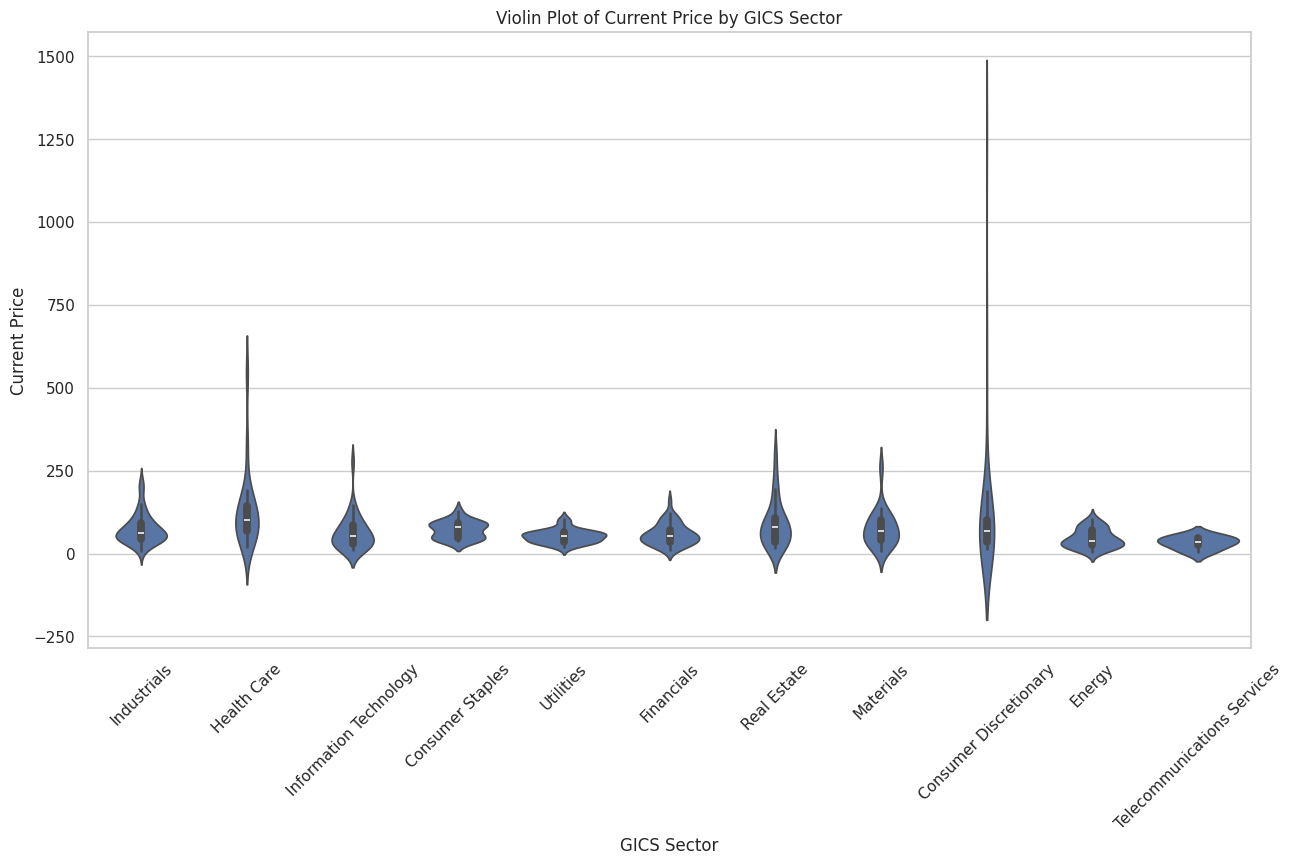

In [ ]:
# Violin plot for GICS Sector
plt.figure(figsize=(15, 8))
sns.violinplot(x='GICS Sector', y='Current Price', data=df)
plt.title("Violin Plot of Current Price by GICS Sector")
plt.xticks(rotation=45)
plt.show()

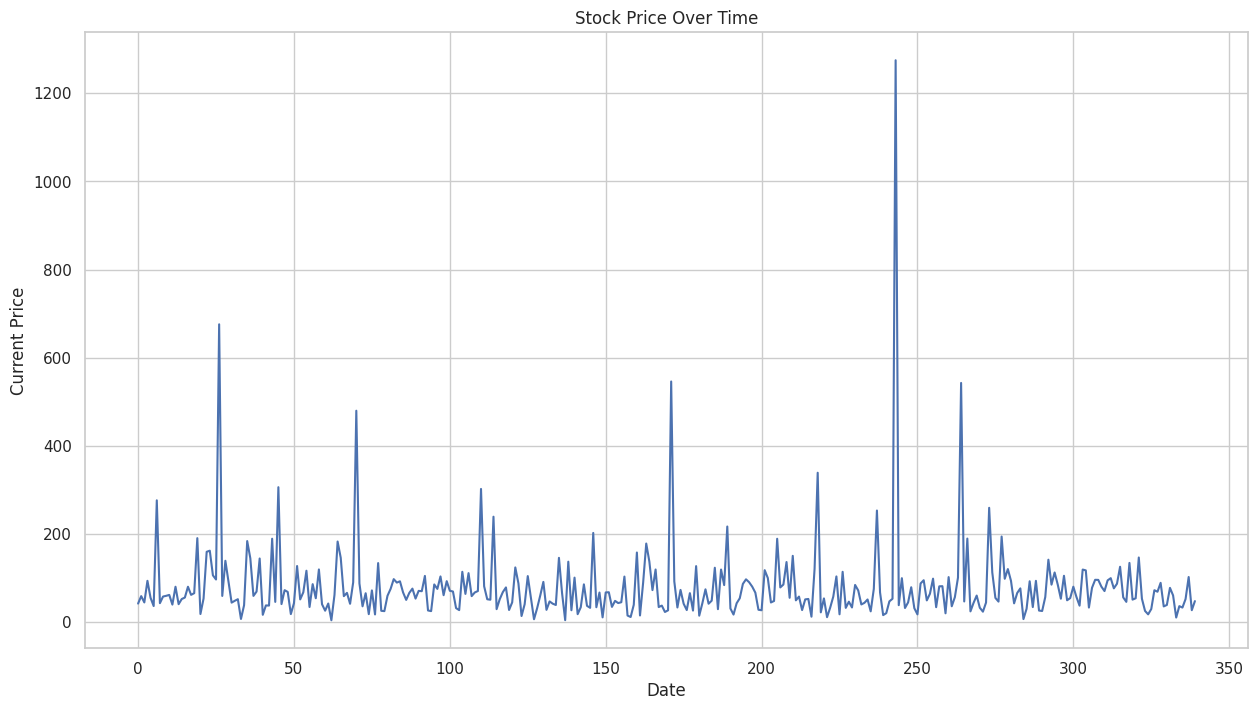

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' and has a 'Date' column
# If you haven't imported seaborn and matplotlib.pyplot, you can do so with:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Assuming 'Date' is in datetime format, if not, convert it using:
# df['Date'] = pd.to_datetime(df['Date'])

# Line plot for 'Current Price' over time
plt.figure(figsize=(15, 8))
sns.lineplot(x=df.index, y='Current Price', data=df)
plt.title("Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Current Price")
plt.show()


Check Multicollinearity

In [ ]:
correlation = df.corr()
correlation

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
Current Price,1.000,0.135,-0.124,-0.001,0.128,-0.022,0.037,0.480,-0.145,0.260,0.125
Price Change,0.135,1.000,-0.408,-0.043,0.169,0.027,0.179,0.175,0.034,-0.002,0.034
Volatility,-0.124,-0.408,1.000,0.163,0.021,-0.014,-0.383,-0.379,-0.096,0.264,0.047
ROE,-0.001,-0.043,0.163,1.000,-0.069,-0.052,-0.289,-0.405,-0.030,0.023,-0.063
Cash Ratio,0.128,0.169,0.021,-0.069,1.000,0.114,0.029,0.025,0.136,0.089,0.230
Net Cash Flow,-0.022,0.027,-0.014,-0.052,0.114,1.000,0.044,0.019,-0.051,0.027,0.057
Net Income,0.037,0.179,-0.383,-0.289,0.029,0.044,1.000,0.558,0.589,-0.224,-0.062
Earnings Per Share,0.480,0.175,-0.379,-0.405,0.025,0.019,0.558,1.000,-0.027,-0.261,0.015
Estimated Shares Outstanding,-0.145,0.034,-0.096,-0.030,0.136,-0.051,0.589,-0.027,1.000,-0.015,-0.028
P/E Ratio,0.260,-0.002,0.264,0.023,0.089,0.027,-0.224,-0.261,-0.015,1.000,0.036


<Axes: >

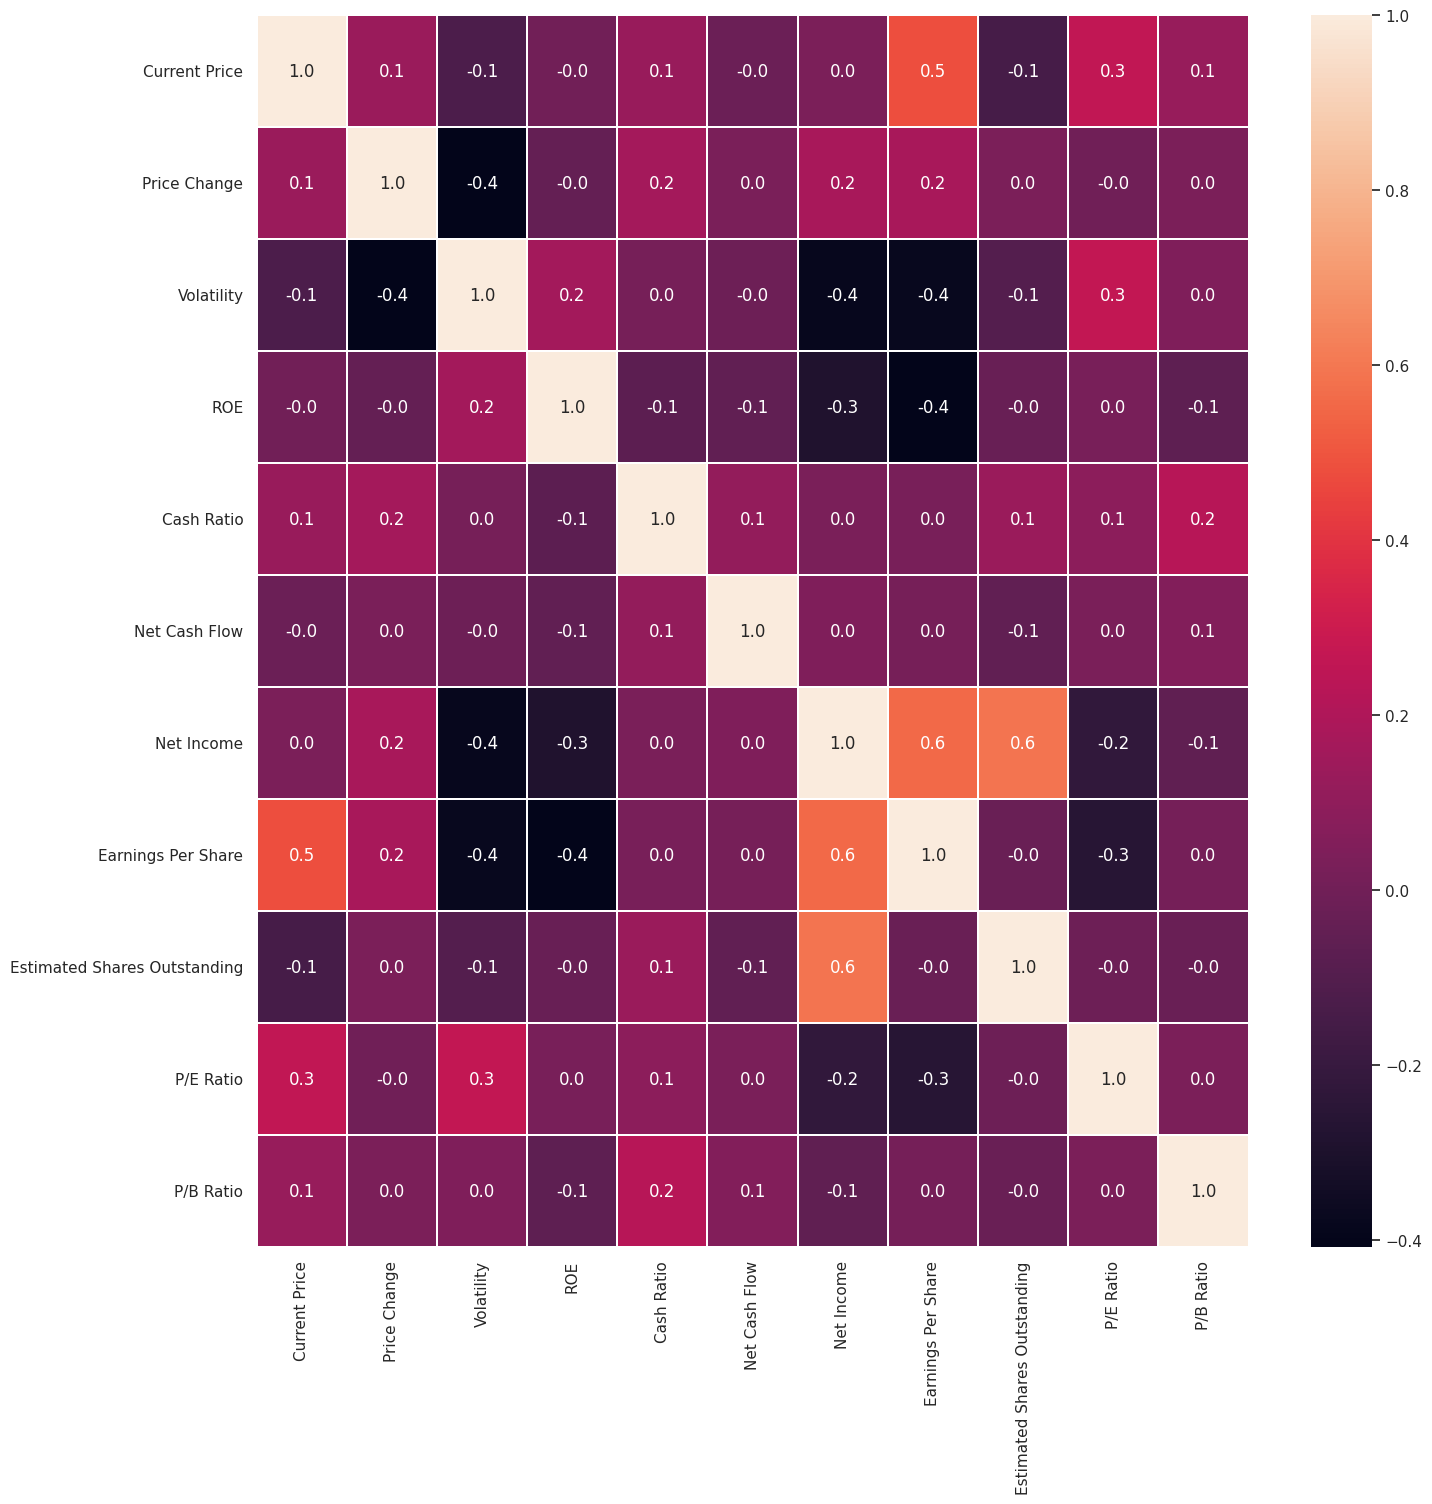

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '1.0001f',ax=ax)

In [ ]:
# # Assuming your DataFrame is named 'df'
# df.drop("Ticker Symbol", axis=1, inplace=True)
# # Drop the original "Security" column if needed
# df.drop('Security', axis=1, inplace=True)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming your DataFrame is named 'df'
# # If 'GICS Sector' is a categorical column with the mentioned unique values

# # Create a LabelEncoder instance
# label_encoder = LabelEncoder()

# # Apply label encoding to 'GICS Sector'
# df['GICS Sector'] = label_encoder.fit_transform(df['GICS Sector'])

# # Display the first few rows of the resulting DataFrame
# df.head()


In [ ]:
pd.set_option("display.max_rows",200)
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet

In [ ]:
scaler = StandardScaler()
subset = df.iloc[:,4:].copy()
subset_scaled=scaler.fit_transform(subset)


In [ ]:
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

K-means Clustering

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1	Average Distortion: 2.5425069919221683
Number of Clusters: 2	Average Distortion: 2.3823184988944663
Number of Clusters: 3	Average Distortion: 2.269236715539076
Number of Clusters: 4	Average Distortion: 2.1745559827866368
Number of Clusters: 5	Average Distortion: 2.1287993328407175
Number of Clusters: 6	Average Distortion: 2.080400099226288
Number of Clusters: 7	Average Distortion: 2.028979422017739
Number of Clusters: 8	Average Distortion: 1.9641441633899717
Number of Clusters: 9	Average Distortion: 1.9221492045198074
Number of Clusters: 10	Average Distortion: 1.851391364997312
Number of Clusters: 11	Average Distortion: 1.8024134734578499
Number of Clusters: 12	Average Distortion: 1.790093187965267
Number of Clusters: 13	Average Distortion: 1.7417609203336906
Number of Clusters: 14	Average Distortion: 1.6735598572597041


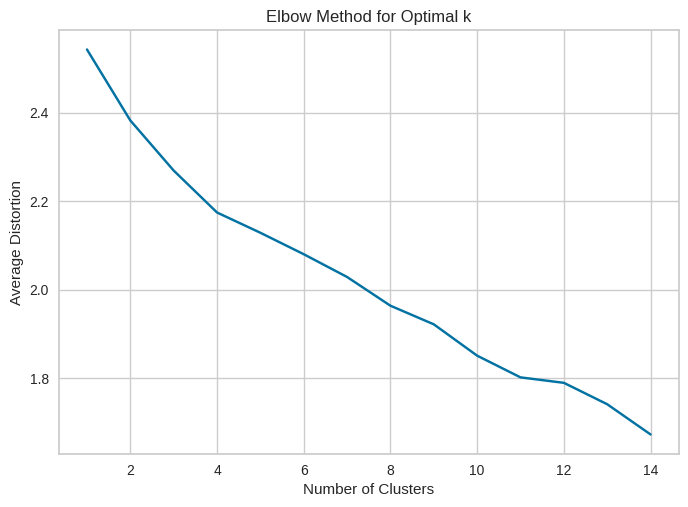

In [ ]:
# Define the range of clusters
clusters = range(1, 15)
meanDistortions = []

# Loop through different cluster numbers
for k in clusters:
    # Create a KMeans model with 'k' clusters
    model = KMeans(n_clusters=k, random_state=1)

    # Fit the model to the scaled data
    model.fit(subset_scaled_df)

    # Predict clusters for each data point
    prediction = model.predict(subset_scaled_df)

    # Calculate the distortion (average distance to cluster centers)
    distortion = np.sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)) / subset_scaled_df.shape[0]

    # Append the distortion to the list
    meanDistortions.append(distortion)

    # Print information about the current iteration
    print(f"Number of Clusters: {k}\tAverage Distortion: {distortion}")

# Plot the elbow curve
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Distortion")
plt.title("Elbow Method for Optimal k")
plt.show()

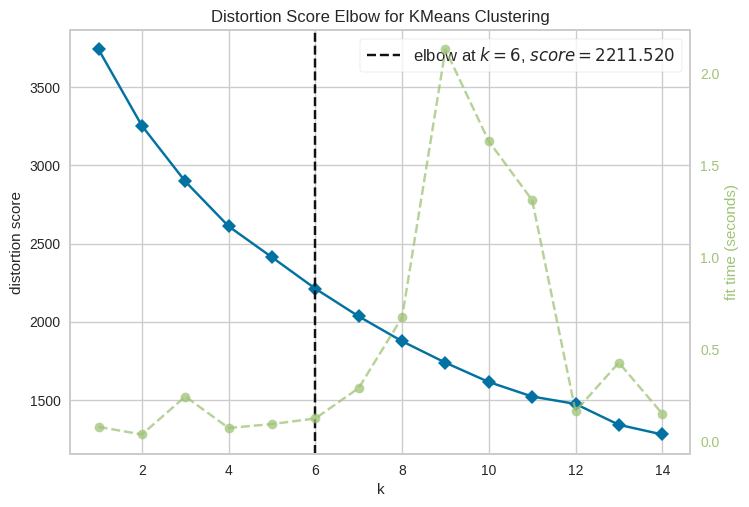

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model,k=(1,15),timings=True)
visualizer.fit(k_means_df)#fit the data to visualizer
visualizer.show()#finalize the render figure

Lets check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43970
For n_clusters = 3, the silhouette score is 0.46444
For n_clusters = 4, the silhouette score is 0.45772
For n_clusters = 5, the silhouette score is 0.43228
For n_clusters = 6, the silhouette score is 0.40054
For n_clusters = 7, the silhouette score is 0.39763
For n_clusters = 8, the silhouette score is 0.40278
For n_clusters = 9, the silhouette score is 0.37786
For n_clusters = 10, the silhouette score is 0.13459
For n_clusters = 11, the silhouette score is 0.14218
For n_clusters = 12, the silhouette score is 0.20447
For n_clusters = 13, the silhouette score is 0.23425
For n_clusters = 14, the silhouette score is 0.12103


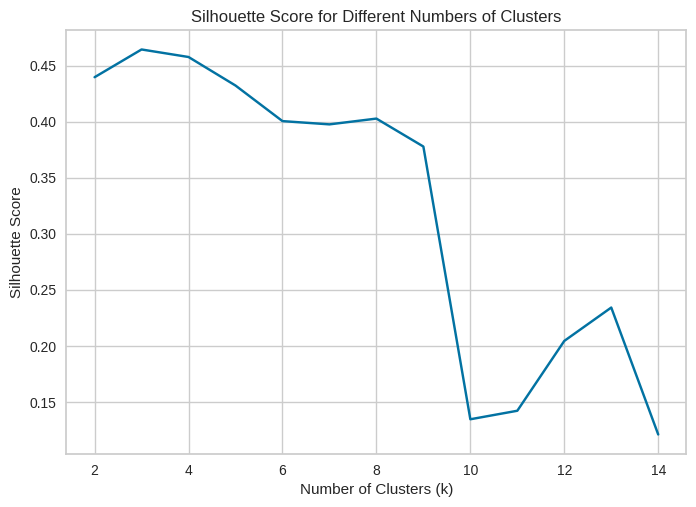

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming subset_scaled_df is your dataset
sil_score = []
cluster_list = range(2, 15)

for n_clusters in cluster_list:
    # Create a KMeans model with 'n_clusters' clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    # Fit the model to the scaled data (use subset_scaled_df)
    preds = clusterer.fit_predict(subset_scaled_df)

    # Calculate silhouette score (use subset_scaled_df for silhouette_score)
    score = silhouette_score(subset_scaled_df, preds)

    print("For n_clusters = {}, the silhouette score is {:.5f}".format(n_clusters, score))
    sil_score.append(score)

# Plot the silhouette scores
plt.plot(cluster_list, sil_score)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

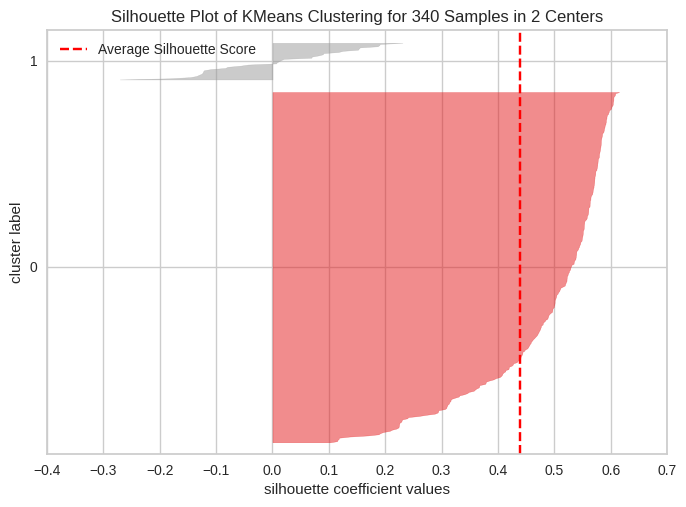

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#finding optical no of clusters with silhouette coefficiets
visualizer = SilhouetteVisualizer(KMeans(2,random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

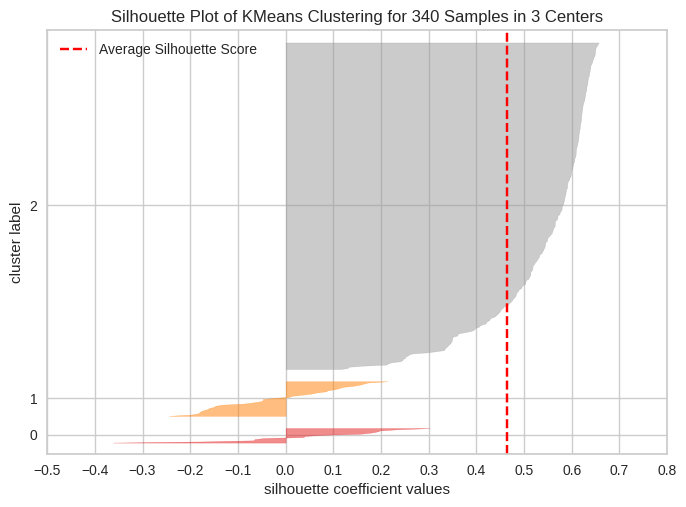

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#finding optical no of clusters with silhouette coefficiets
visualizer = SilhouetteVisualizer(KMeans(3,random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

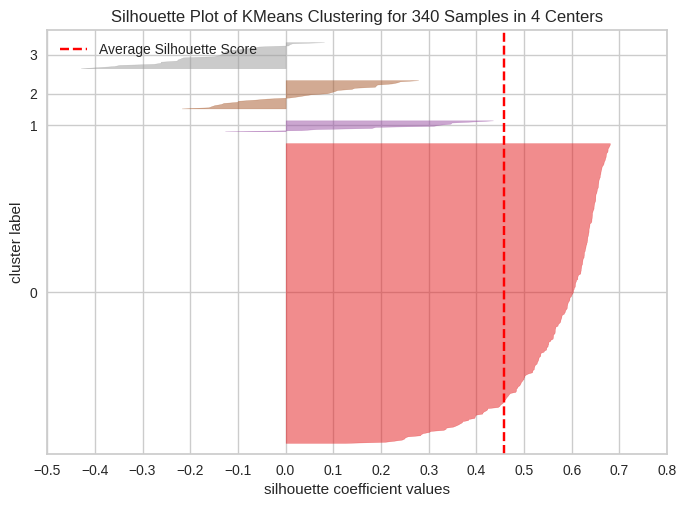

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#finding optical no of clusters with silhouette coefficiets
visualizer = SilhouetteVisualizer(KMeans(4,random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

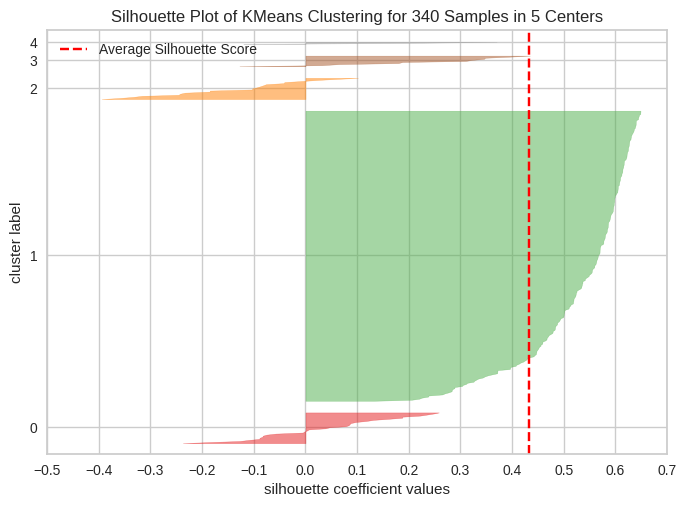

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#finding optical no of clusters with silhouette coefficiets
visualizer = SilhouetteVisualizer(KMeans(5,random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

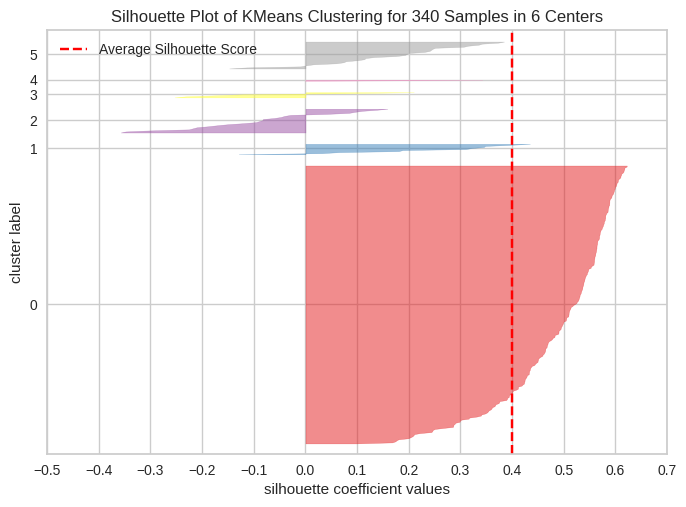

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#finding optical no of clusters with silhouette coefficiets
visualizer = SilhouetteVisualizer(KMeans(6,random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

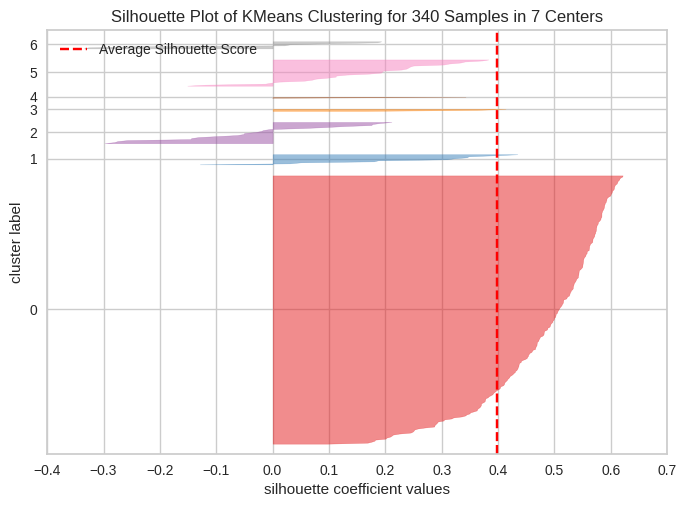

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#finding optical no of clusters with silhouette coefficiets
visualizer = SilhouetteVisualizer(KMeans(7,random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Observations**

*   For 4 Clusters,There is nik in elbow plot and silhouette score is high too.
*   So we will move ahead with k=4.



Creating Final Model

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [ ]:
#creating a copy of original data
df1 = df.copy()

#adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

Cluster Profiling

In [ ]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [ ]:
# Let's see the names of companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"]==cl]["Security"].unique())
    print()


In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [ ]:
# Iterate through each unique cluster in "KM_segments"
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))

    # Print the count of companies in each combination of "KM_segments" and "GICS Sector"
    cluster_subset = df1[df1["KM_segments"] == cl]
    for index, row in cluster_subset.groupby(["KM_segments", "GICS Sector"]).count().iterrows():
        print(index,row['Security'])

    print()


In cluster 0, the following companies are present:
(0, 'Consumer Discretionary') 33
(0, 'Consumer Staples') 17
(0, 'Energy') 6
(0, 'Financials') 45
(0, 'Health Care') 29
(0, 'Industrials') 52
(0, 'Information Technology') 24
(0, 'Materials') 19
(0, 'Real Estate') 26
(0, 'Telecommunications Services') 2
(0, 'Utilities') 24

In cluster 3, the following companies are present:
(3, 'Consumer Discretionary') 6
(3, 'Consumer Staples') 1
(3, 'Energy') 1
(3, 'Financials') 1
(3, 'Health Care') 9
(3, 'Information Technology') 5
(3, 'Real Estate') 1
(3, 'Telecommunications Services') 1

In cluster 2, the following companies are present:
(2, 'Energy') 22
(2, 'Industrials') 1
(2, 'Information Technology') 3
(2, 'Materials') 1

In cluster 1, the following companies are present:
(1, 'Consumer Discretionary') 1
(1, 'Consumer Staples') 1
(1, 'Energy') 1
(1, 'Financials') 3
(1, 'Health Care') 2
(1, 'Information Technology') 1
(1, 'Telecommunications Services') 2



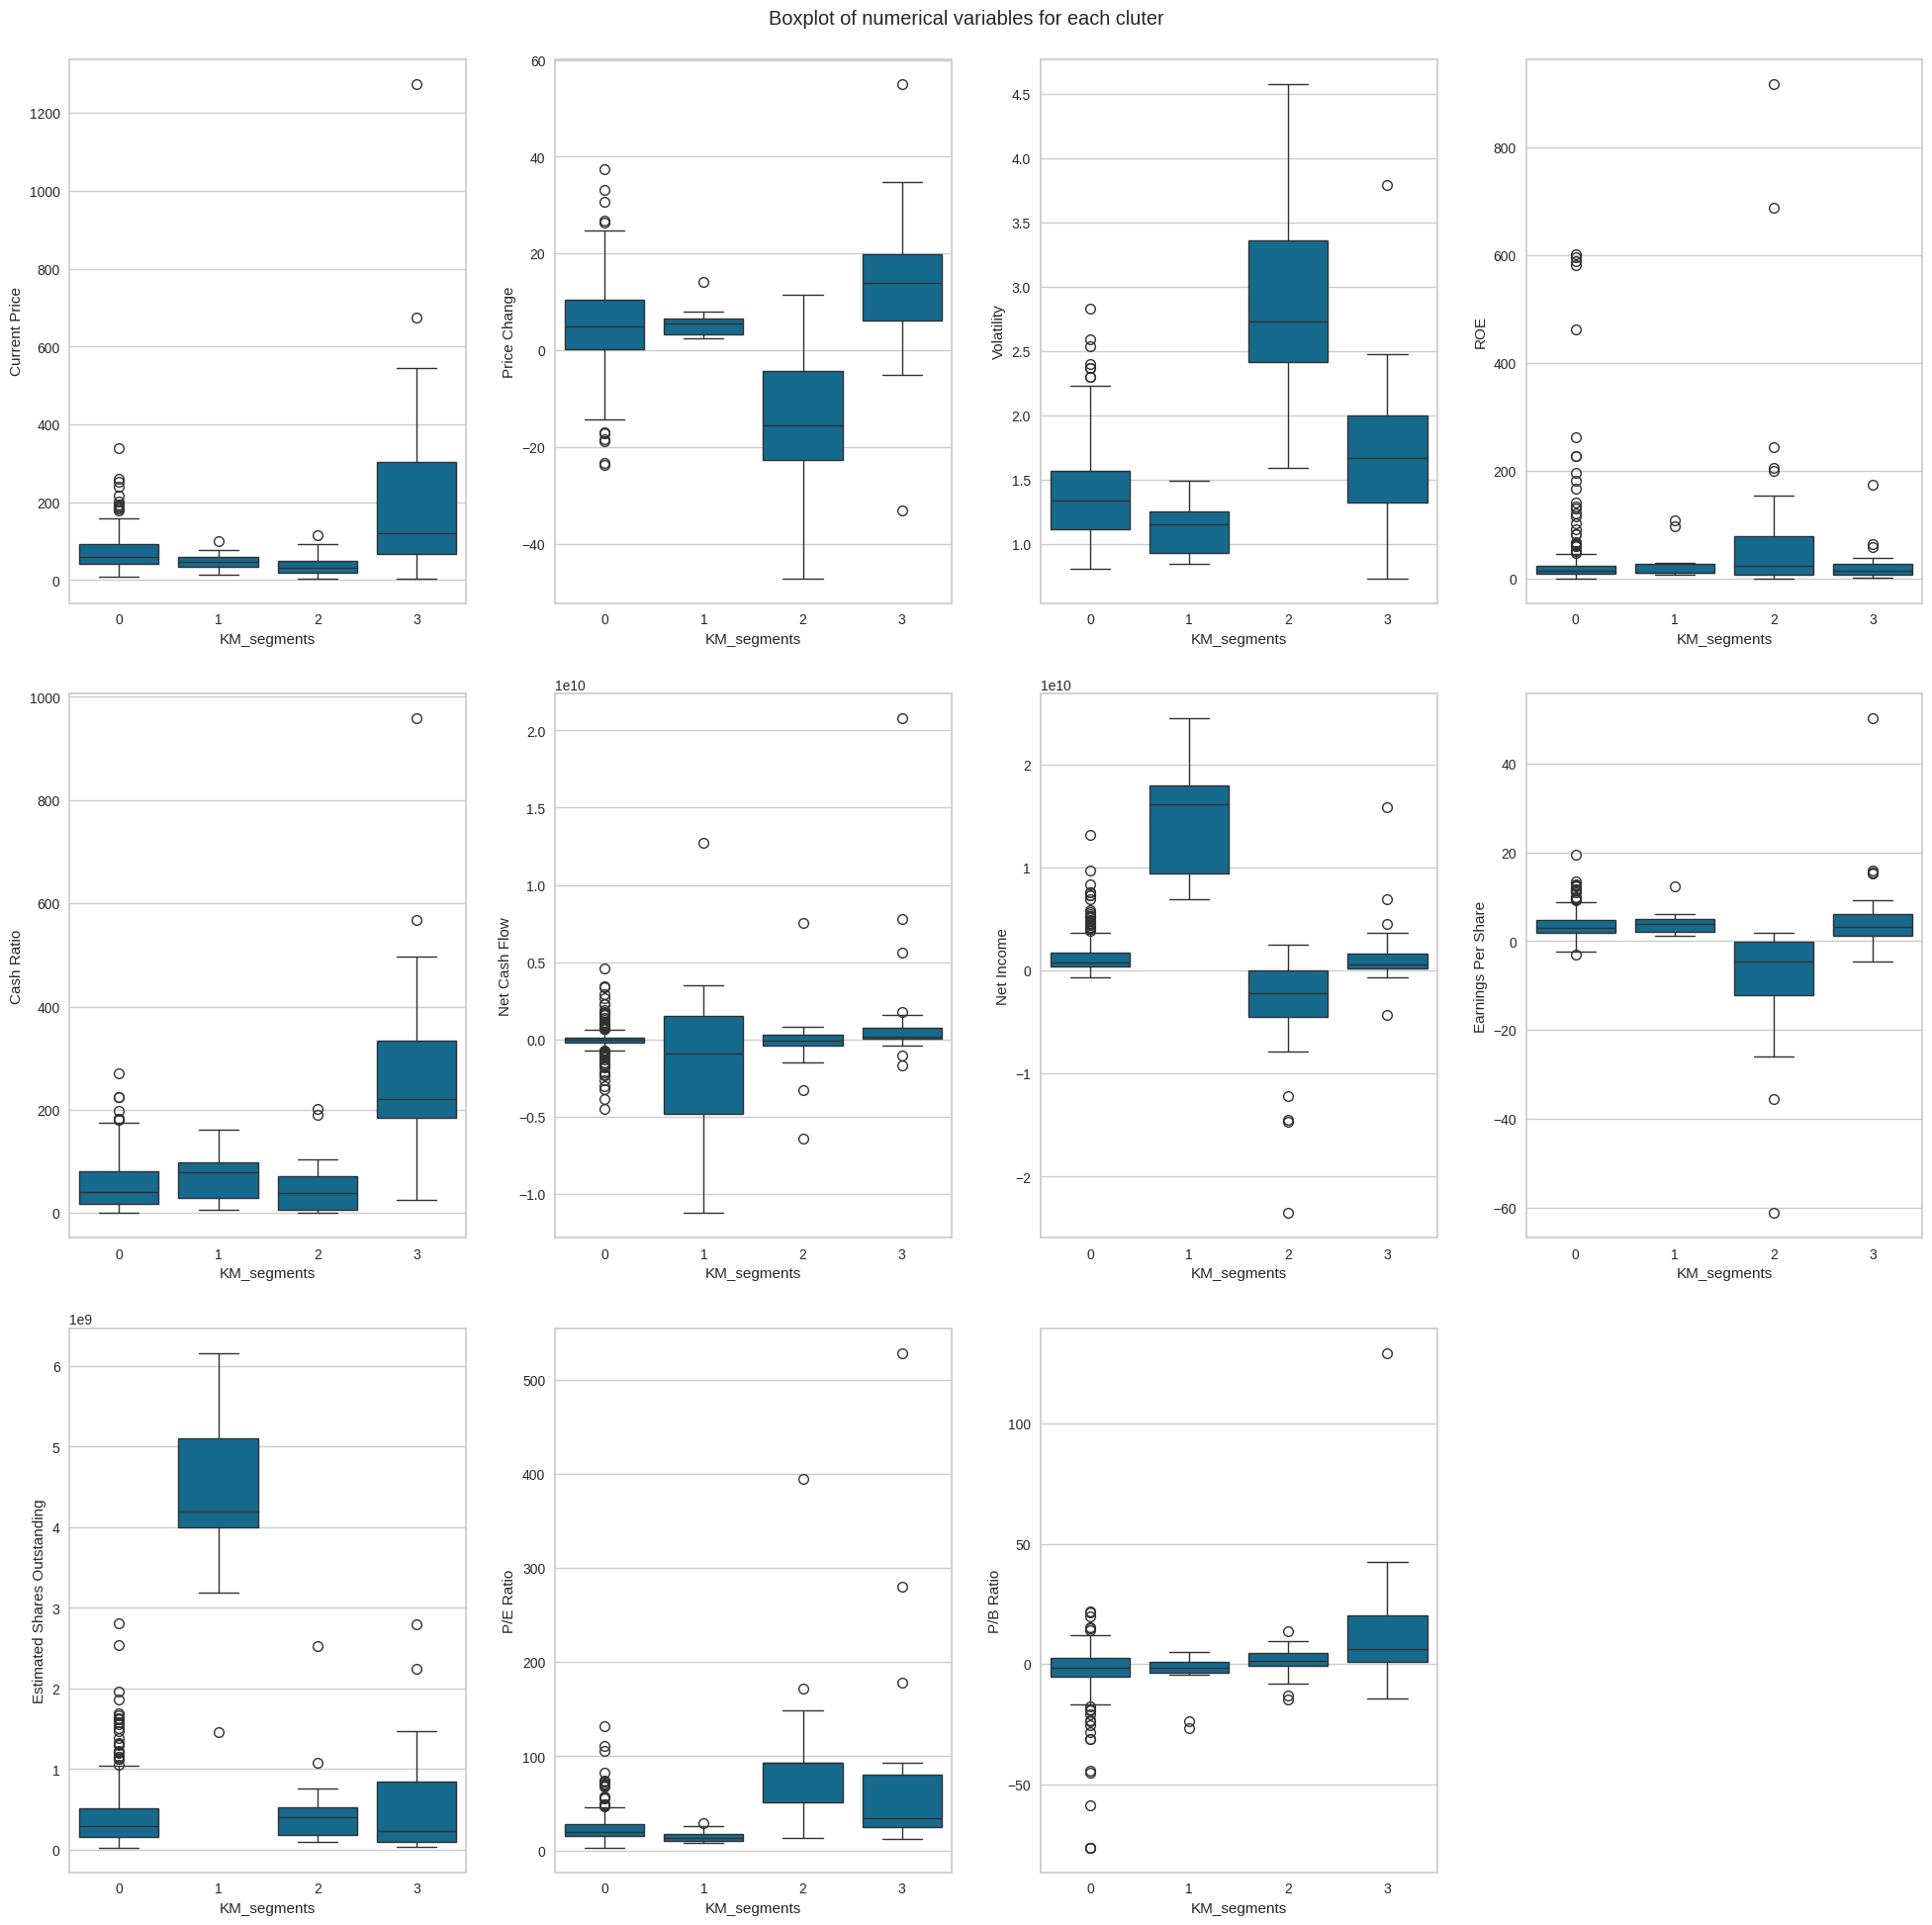

In [ ]:
plt.figure(figsize=(20,20))
plt.suptitle("Boxplot of numerical variables for each cluter")

#selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
  plt.subplot(3, 4,i+1)
  sns.boxplot(data=df1, x="KM_segments",y=variable)

plt.tight_layout(pad=2.0)
plt.show()



*   **Cluster 0**
          
        * There are 277 companies in this cluster.
        * The stocks of the companies in this cluster have modrate price, low volatily,and have witnessed 5% price rise average.
        * These companies have a low cash ratio and low positive net income.
        * These companies have low P/E ratio and a high number of outstanding shares.

*   **Cluster 1**
          
        * There are 11 companies in this cluster.
        * The stocks of the companies in this cluster have low price, low volatily,and have witnessed 6% price rise average.
        * These companies have a low cash ratio and high positive net income.
        * These companies have low P/E ratio and a high number of outstanding shares.

*   **Cluster 2**
          
        * There are 27 companies in this cluster.
        * The stocks of the companies in this cluster have low price, high volatily,and have witnessed 15% price rise average.
        * These companies have a low cash ratio and negative net income.
        * These companies have high P/E ratio and a low number of outstanding shares.

*   **Cluster 3**
          
        * There are 25 companies in this cluster.
        * The stocks of the companies in this cluster have high price, modrate volatily,and have witnessed 13.5% price rise average.
        * These companies have a high cash ratio and low positive net income.
        * These companies have modrate P/E ratio and a low to modrate number of outstanding shares.


Computing Cophenetic correlation

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
#list of distance metrics
distance_metrics = ["euclidean","chebyshev","mahalanobis","cityblock"]

#list of linkage methods
linkage_methods = ["single","complete","average","weighted"]

high_cophenet_corr = 0
high_dm_lm = [0,0]

for dm in distance_metrics:
  for lm in linkage_methods:
    Z = linkage(hc_df,metric=dm,method=lm)
    c,coph_dists=cophenet(Z,pdist(hc_df))
    print(
        "Cophenetic correlation for {} distyance and {} linkage is {}.".format(
            dm.capitalize(),lm,c
        )
    )
    if high_cophenet_corr < c:
      high_cophenet_corr = c
      high_dm_lm[0] = dm
      high_dm_lm[1] = lm

#printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linlkage.".format(
        high_cophenet_corr,high_dm_lm[0].capitalize(),high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distyance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distyance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distyance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distyance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distyance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distyance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distyance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distyance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distyance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distyance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distyance and average linkage is 0.9247324030159736.
Cophene

In [ ]:
#list of linkage methods
linkage_methods= ["single","complete","average","weighted"]

high_cophenet_corr = 0
high_dm_lm = [0,0]

for lm in linkage_methods:
   Z = linkage(hc_df,metric="euclidean",method=lm)
   c,coph_dists=cophenet(Z,pdist(hc_df))
   print("Cophenetic correlation for {} linkage is {}.".format(lm,c))
   if high_cophenet_corr < c:
     high_cophenet_corr = c
     high_dm_lm[0] = dm
     high_dm_lm[1] = lm


#printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linlkage.".format(
        high_cophenet_corr,high_dm_lm[0].capitalize(),high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with Cityblock distance and average linlkage.


CHecking Dendrograms

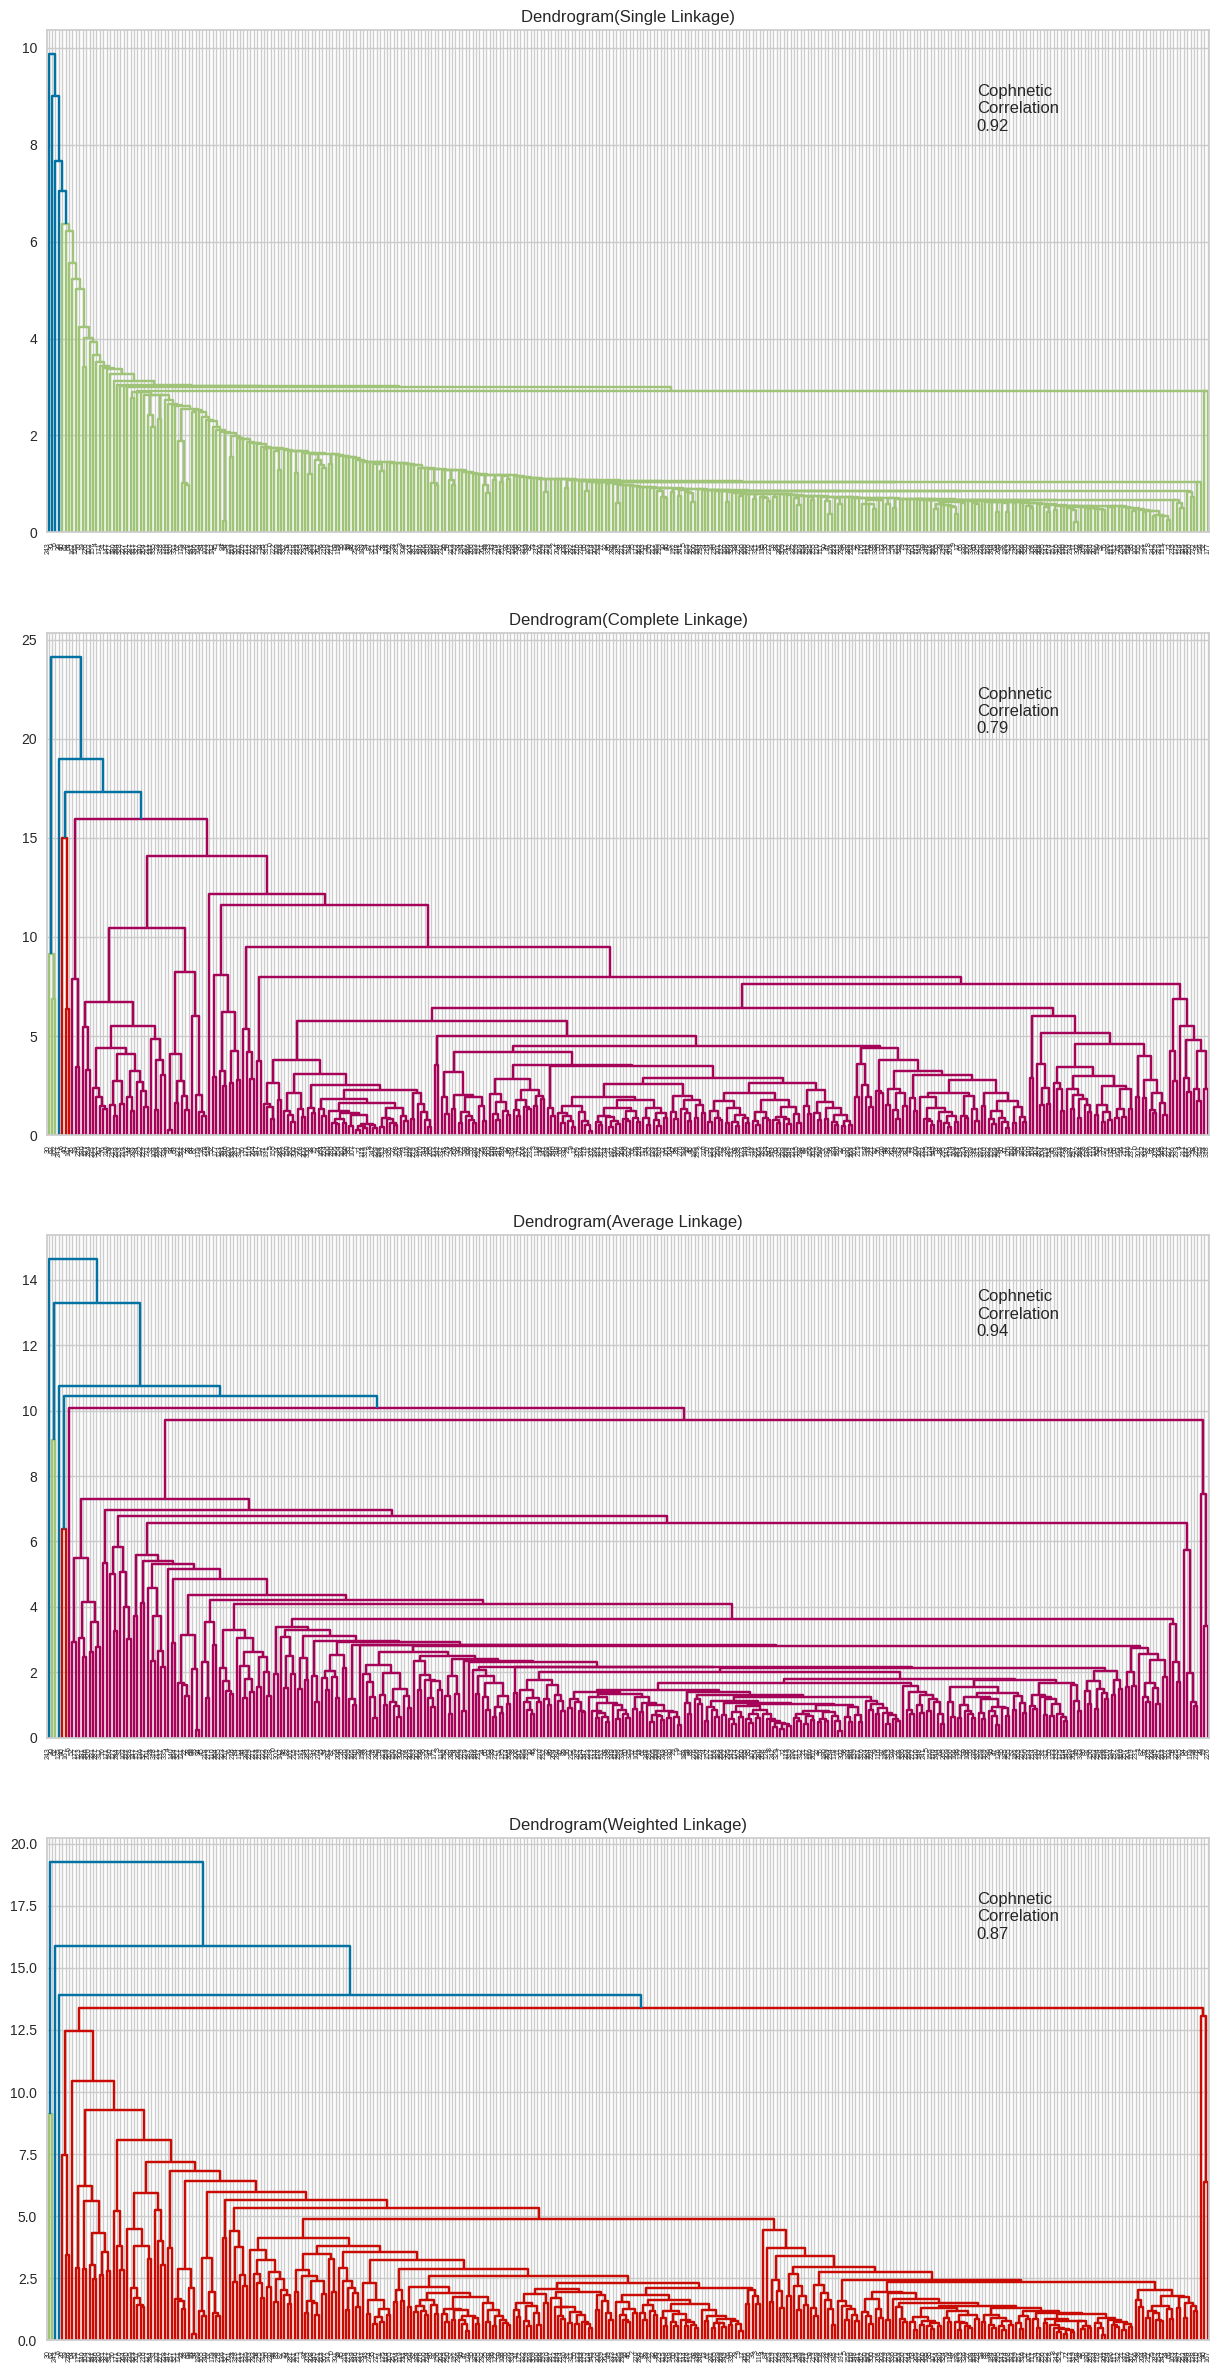

In [ ]:
#list of linkage methods
linkage_methods= ["single","complete","average","weighted"]

#list to save results of cophenetic correlation calculation
compare_cols = ["Linkage","Cophenetic Coefficient"]
compare = []

#to create a subplot image
fig,axs =plt.subplots(len(linkage_methods),1,figsize=(15,30))

#we will enmerate throgh the list of linkage methods above
#for each linkage method, we will plot dendrogram and calculate correlation
for i, method in enumerate(linkage_methods):
  Z = linkage(hc_df,metric="euclidean",method=method)

  dendrogram(Z,ax=axs[i])
  axs[i].set_title(f"Dendrogram({method.capitalize()} Linkage)")

  coph_corr,coph_dist=cophenet(Z,pdist(hc_df))
  axs[i].annotate(
      f"Cophnetic\nCorrelation\n{coph_corr:0.2f}",
      (0.80,0.80),
      xycoords="axes fraction"
  )

  compare.append({method,coph_corr})


Creating model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [ ]:
#creating copy of original data
df2=df.copy()

#adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

Cluster Profiling

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.653642,4.184271,1.515129,35.103858,69.798220,68662246.290801,1613508620.178041,2.900905,578930419.447478,32.466828,-1.739711,337
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2


In [ ]:
# Let's see the names of companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"]==cl]["Security"].unique())
    print()


In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

In [ ]:
# Iterate through each unique cluster in "KM_segments"
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))

    # Print the count of companies in each combination of "KM_segments" and "GICS Sector"
    cluster_subset = df2[df2["HC_segments"] == cl]
    for index, row in cluster_subset.groupby(["HC_segments", "GICS Sector"]).count().iterrows():
        print(index,row['Security'])

    print()


In cluster 0, the following companies are present:
(0, 'Consumer Discretionary') 39
(0, 'Consumer Staples') 19
(0, 'Energy') 28
(0, 'Financials') 49
(0, 'Health Care') 40
(0, 'Industrials') 53
(0, 'Information Technology') 33
(0, 'Materials') 20
(0, 'Real Estate') 27
(0, 'Telecommunications Services') 5
(0, 'Utilities') 24

In cluster 2, the following companies are present:
(2, 'Energy') 2

In cluster 1, the following companies are present:
(1, 'Consumer Discretionary') 1



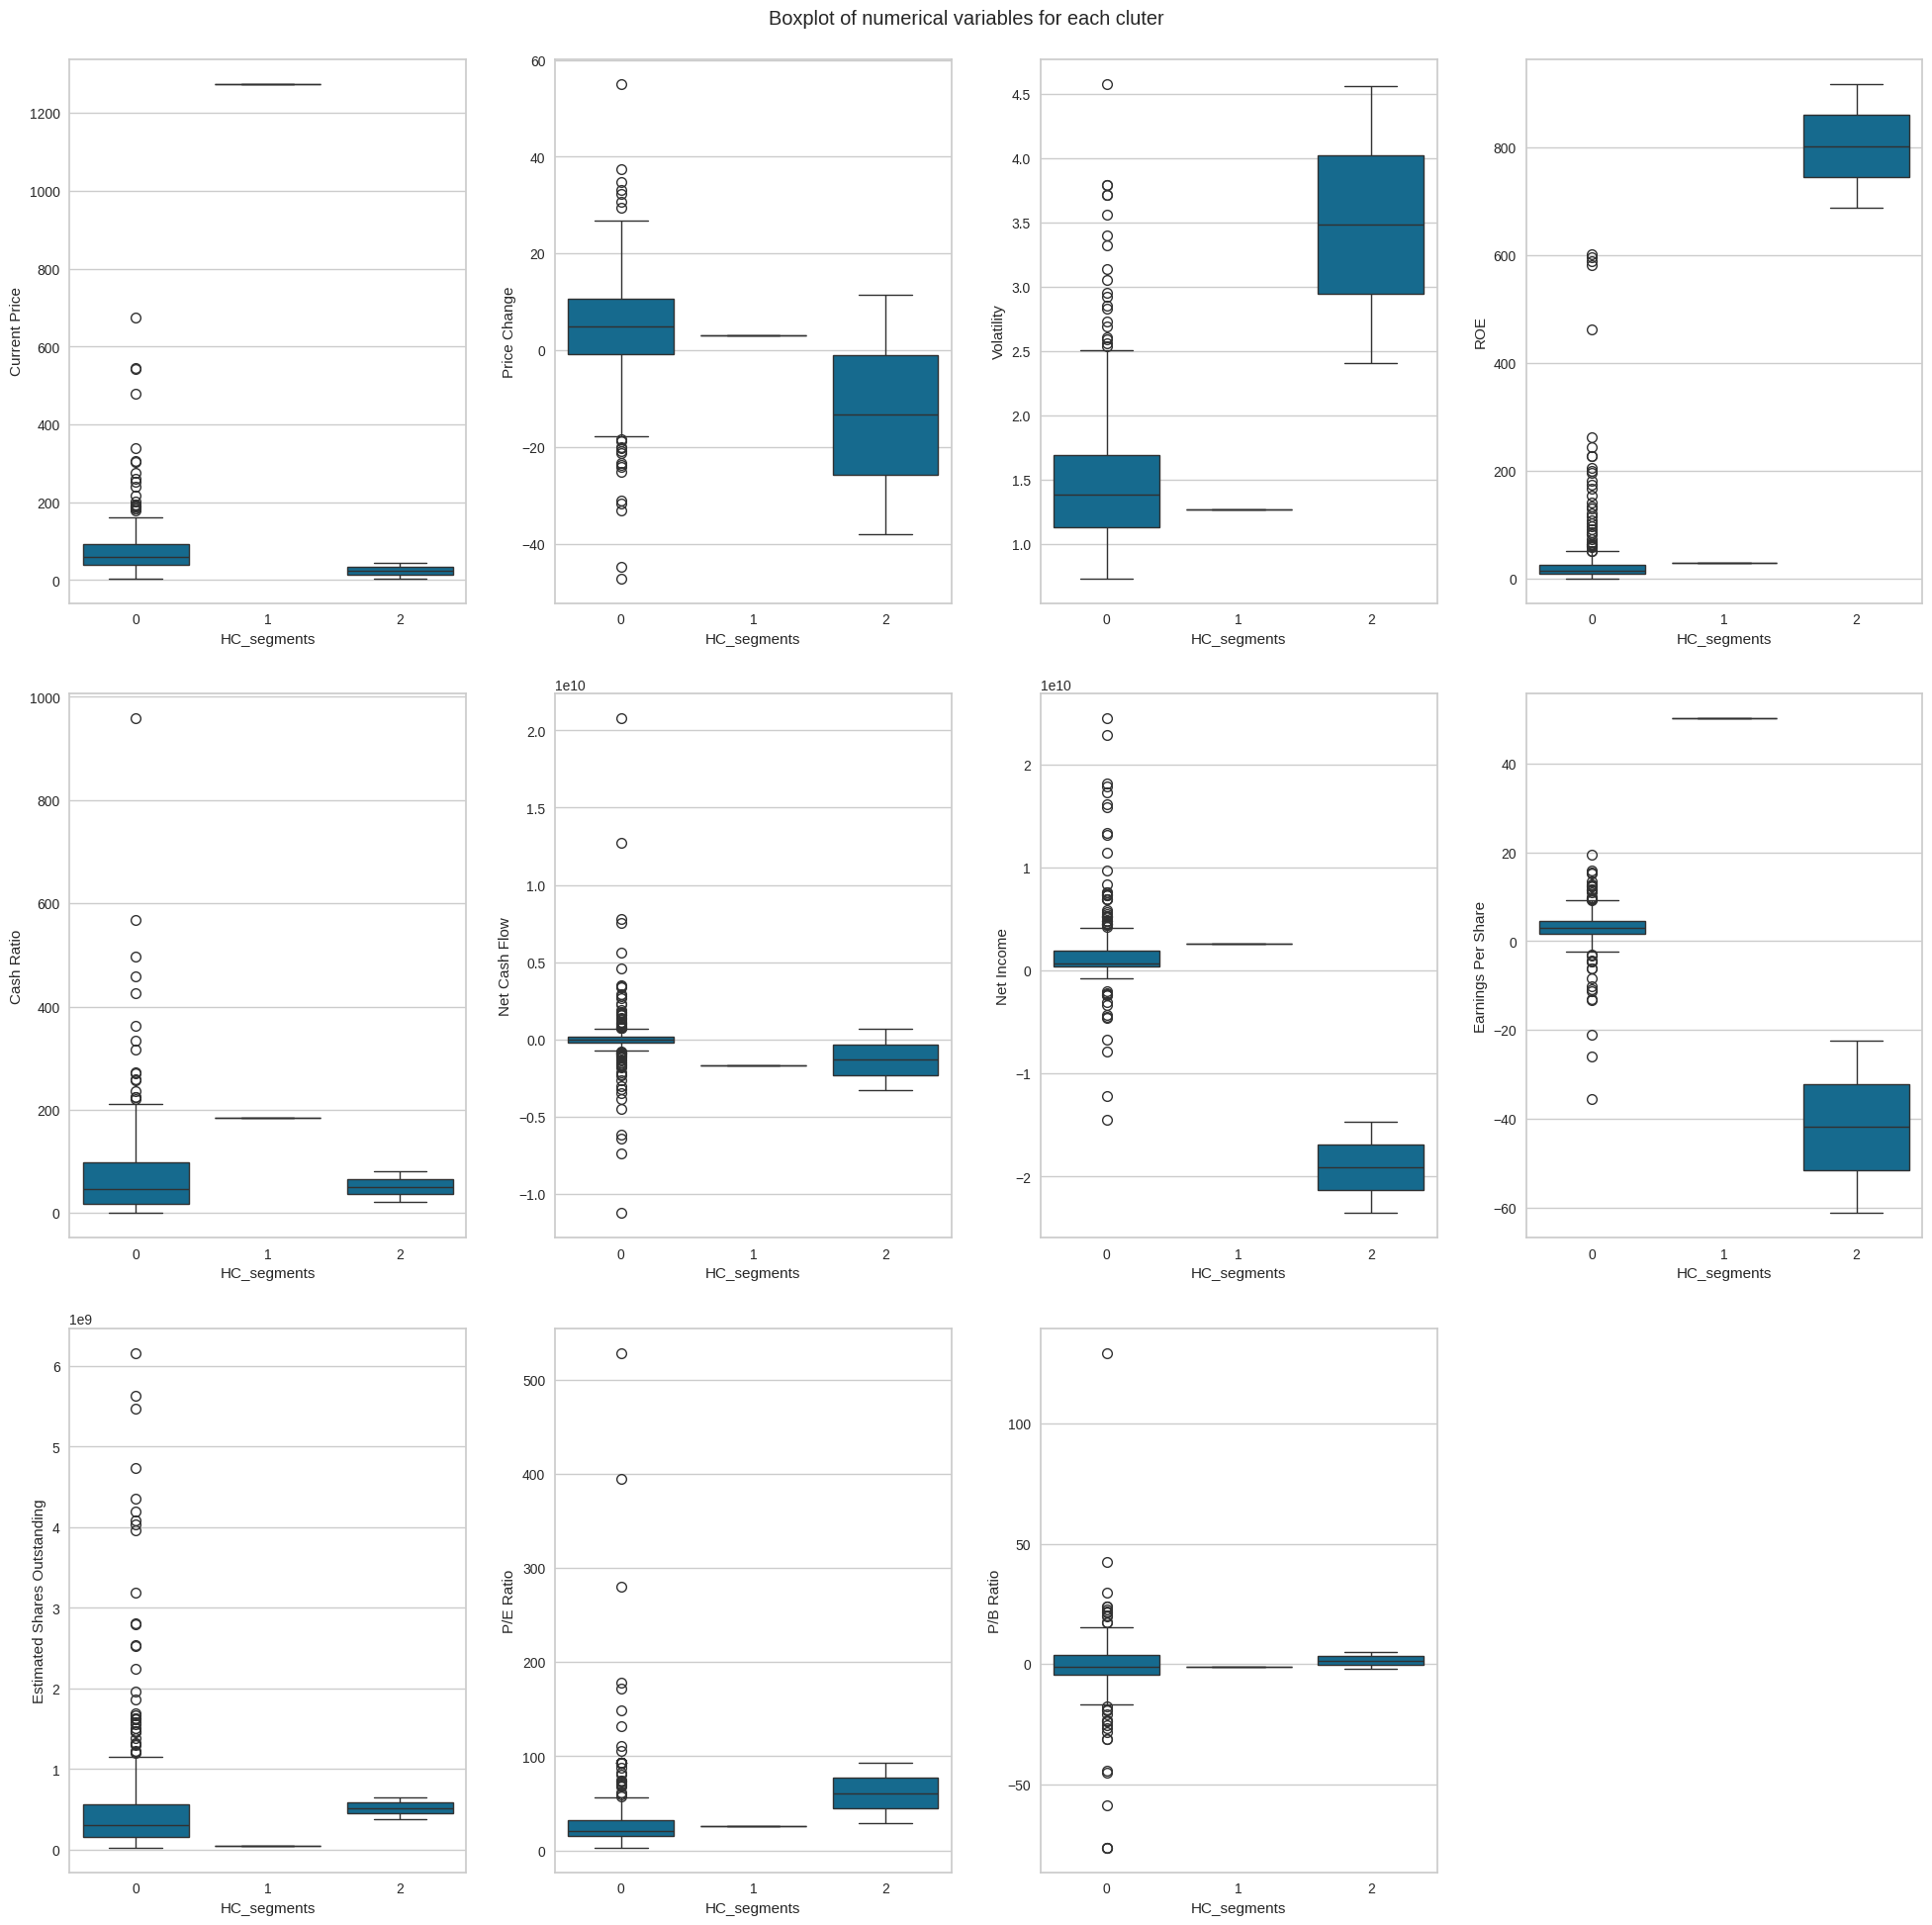

In [ ]:
plt.figure(figsize=(20,20))
plt.suptitle("Boxplot of numerical variables for each cluter")

#selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
  plt.subplot(3, 4,i+1)
  sns.boxplot(data=df2, x="HC_segments",y=variable)

plt.tight_layout(pad=2.0)
plt.show()



*   **Cluster 0**
          
        * There are 277 companies in this cluster.
        * The stocks of the companies in this cluster have modrate price, low volatily,and have witnessed 5% price rise average.
        * These companies have a low cash ratio and low positive net income.
        * These companies have low P/E ratio and a high number of outstanding shares.

*   **Cluster 1**
          
        * There are 2 companies in this cluster.
        * The stocks of the companies in this cluster have low price, low volatily,and have witnessed 6% price rise average.
        * These companies have a low cash ratio and high positive net income.
        * These companies have low P/E ratio and a high number of outstanding shares.

*   **Cluster 2**
          
        * There are 1 companies in this cluster.
        * The stocks of the companies in this cluster have low price, high volatily,and have witnessed 15% price rise average.
        * These companies have a low cash ratio and negative net income.
        * These companies have high P/E ratio and a low number of outstanding shares.

comparing model